In [1]:
! pip install pyrosm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 4.3 MB/s eta 0:00:004.4 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached setuptools-70.0.0-py3-none-any.whl.metadata (5.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pyrobuf-0.9.3-cp312-cp312-linux_x86_64.whl
  Using cached Cython-3.0.10-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.2 kB)
Using cached setuptools-70.0.0-py3-none-any.whl (863 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.9 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached Cython-3.0.10-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.5 MB)
  Created wheel for pyrosm: filename=pyrosm-0.6.2-cp312-cp312-linux_x86_

In [2]:
import pyrosm
fp = pyrosm.get_data("scotland")


Downloaded Protobuf data 'scotland-latest.osm.pbf' (255.5 MB) to:
'/tmp/pyrosm/scotland-latest.osm.pbf'


In [3]:
from pyrosm import OSM
osm = OSM(fp)

In [4]:
from shapely import geometry
# p1 = geometry.Point(-2.4036,57.25)
# p2 = geometry.Point(-1.8646,57.25)
# p3 = geometry.Point(-1.8646,57.15)
# p4 = geometry.Point(-2.4036,57.15)
p1 = geometry.Point(-2.15,57.21)
p2 = geometry.Point(-2.05,57.21)
p3 = geometry.Point(-2.05,57.15)
p4 = geometry.Point(-2.15,57.15)
pointList = [p1, p2, p3, p4, p1]
poly = geometry.Polygon([[p.x, p.y] for p in pointList])

In [5]:
c_osm = OSM(fp, bounding_box=poly)

In [6]:
aberdeen = c_osm.get_buildings()

In [62]:
aberdeen.head()

,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,opening_hours,...,source,start_date,wikipedia,id,timestamp,version,tags,osm_type,geometry,changeset
0,None,None,None,None,None,None,None,None,Fraser Noble Building,None,...,knowledge,None,None,7832985,1692645852,20,"{""name:be"":""\u0411\u0443\u0434\u044B\u043D\u04...",way,"POLYGON ((-2.10545 57.16615, -2.10499 57.16617...",NaN
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,8056321,1654282973,10,None,way,"POLYGON ((-2.11318 57.15690, -2.11356 57.15673...",NaN
2,None,None,None,None,None,None,None,None,Harry Corry,None,...,None,None,None,8056358,1660604526,6,"{""brand"":""Harry Corry"",""brand:wikidata"":""Q5668...",way,"POLYGON ((-2.11606 57.15741, -2.11537 57.15755...",NaN
3,None,None,None,None,None,None,None,None,None,None,...,knowledge,None,None,8056359,1681137579,6,"{""roof:shape"":""flat"",""source:shape"":""bing""}",way,"POLYGON ((-2.11286 57.15639, -2.11266 57.15609...",NaN
4,Aberdeen,GB,None,Beach Boulevard Retail Park,AB11 5EJ,None,None,None,Asda,07:00-21:45,...,None,None,None,9704058,1711218668,16,"{""addr:unit"":""1"",""brand"":""Asda"",""brand:wikidat...",way,"POLYGON ((-2.08188 57.15108, -2.08136 57.15052...",NaN


In [65]:
aberdeen.to_file("Data/AberdeenBuildings.geojson", driver="GeoJSON")

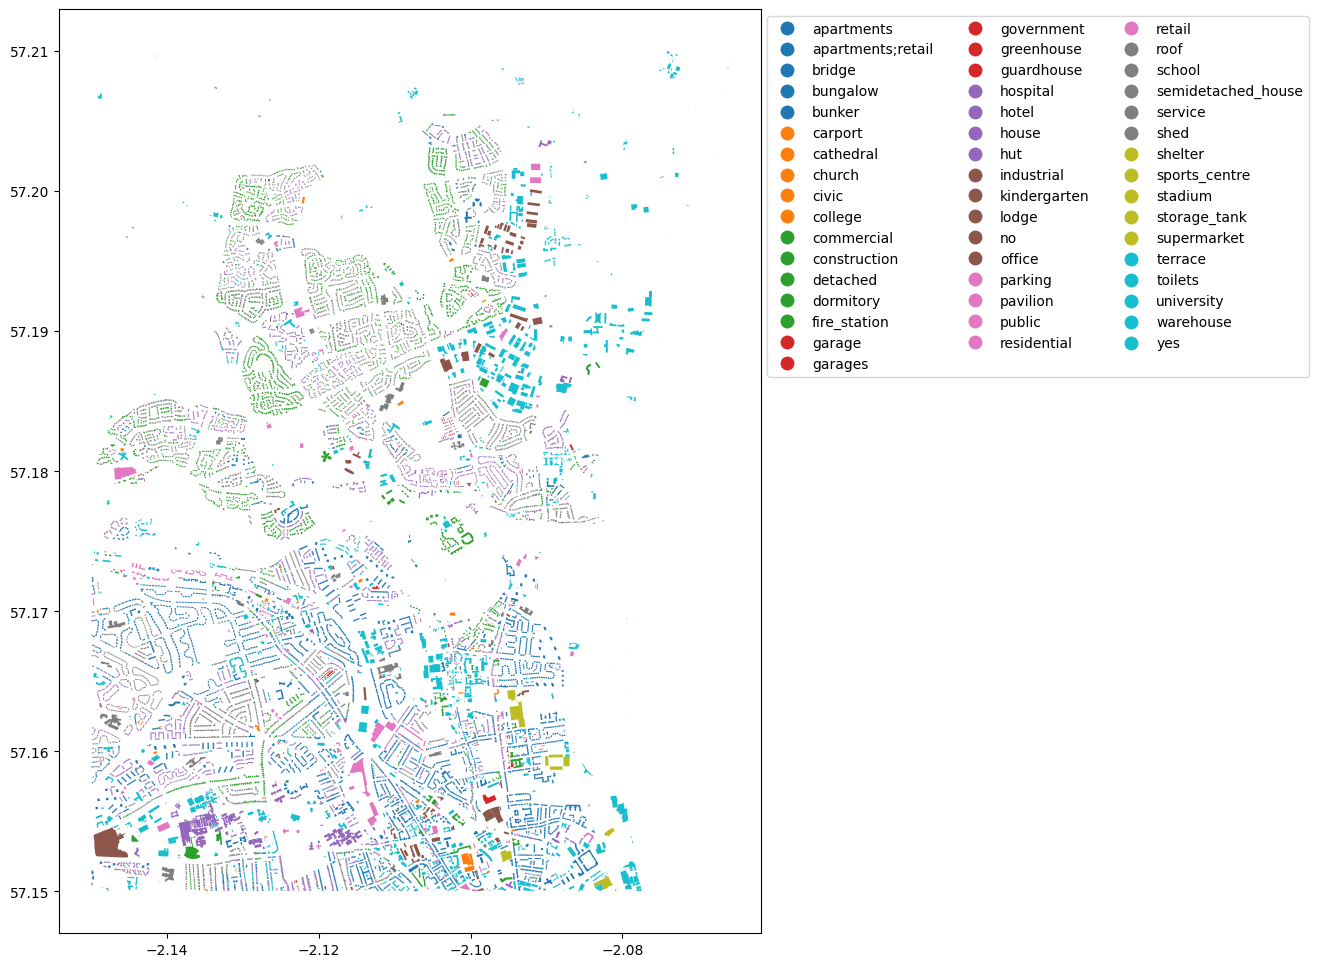

In [25]:
ax = aberdeen.plot(column="building", figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=3, bbox_to_anchor=(1, 1)))

In [29]:
aberdeen.columns.tolist()

['addr:city',
 'addr:country',
 'addr:housenumber',
 'addr:housename',
 'addr:postcode',
 'addr:place',
 'addr:street',
 'email',
 'name',
 'opening_hours',
 'operator',
 'phone',
 'ref',
 'url',
 'visible',
 'website',
 'building',
 'amenity',
 'building:flats',
 'building:levels',
 'building:material',
 'building:min_level',
 'building:use',
 'craft',
 'height',
 'internet_access',
 'landuse',
 'office',
 'shop',
 'source',
 'start_date',
 'wikipedia',
 'id',
 'timestamp',
 'version',
 'tags',
 'osm_type',
 'geometry',
 'changeset']

In [34]:
aberdeen['building'].unique()

array(['university', 'retail', 'supermarket', 'dormitory', 'yes',
       'apartments', 'commercial', 'parking', 'greenhouse', 'office',
       'semidetached_house', 'hospital', 'terrace', 'detached', 'shed',
       'service', 'garage', 'hotel', 'house', 'garages', 'school',
       'cathedral', 'sports_centre', 'civic', 'industrial', 'residential',
       'church', 'stadium', 'public', 'roof', 'government',
       'fire_station', 'storage_tank', 'pavilion', 'warehouse', 'no',
       'toilets', 'lodge', 'kindergarten', 'bunker', 'carport',
       'bungalow', 'apartments;retail', 'hut', 'bridge', 'guardhouse',
       'construction', 'shelter', 'college'], dtype=object)

In [28]:
aberdeen.head()

,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,opening_hours,...,source,start_date,wikipedia,id,timestamp,version,tags,osm_type,geometry,changeset
0,None,None,None,None,None,None,None,None,Fraser Noble Building,None,...,knowledge,None,None,7832985,1692645852,20,"{""name:be"":""\u0411\u0443\u0434\u044B\u043D\u04...",way,"POLYGON ((-2.10545 57.16615, -2.10499 57.16617...",NaN
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,8056321,1654282973,10,None,way,"POLYGON ((-2.11318 57.15690, -2.11356 57.15673...",NaN
2,None,None,None,None,None,None,None,None,Harry Corry,None,...,None,None,None,8056358,1660604526,6,"{""brand"":""Harry Corry"",""brand:wikidata"":""Q5668...",way,"POLYGON ((-2.11606 57.15741, -2.11537 57.15755...",NaN
3,None,None,None,None,None,None,None,None,None,None,...,knowledge,None,None,8056359,1681137579,6,"{""roof:shape"":""flat"",""source:shape"":""bing""}",way,"POLYGON ((-2.11286 57.15639, -2.11266 57.15609...",NaN
4,Aberdeen,GB,None,Beach Boulevard Retail Park,AB11 5EJ,None,None,None,Asda,07:00-21:45,...,None,None,None,9704058,1711218668,16,"{""addr:unit"":""1"",""brand"":""Asda"",""brand:wikidat...",way,"POLYGON ((-2.08188 57.15108, -2.08136 57.15052...",NaN


In [68]:
road = c_osm.get_network("driving")



/home/ric/Projects/NetwokABMPy/venv/lib/python3.12/site-packages/pyrosm/networks.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  edges, nodes = prepare_geodataframe(


In [69]:
road.head()

,access,area,bicycle,bridge,busway,cycleway,foot,highway,junction,lanes,...,tunnel,turn,width,id,timestamp,version,tags,osm_type,geometry,length
0,None,None,None,None,None,None,None,residential,None,2,...,None,None,None,3508160,1706148094,22,"{""visible"":false,""abutters"":""residential"",""cyc...",way,"MULTILINESTRING ((-2.09683 57.16265, -2.09693 ...",317.0
1,None,None,yes,None,None,None,None,pedestrian,None,None,...,None,None,10,3508161,1710879472,26,"{""visible"":false,""abutters"":""residential"",""max...",way,"MULTILINESTRING ((-2.10200 57.16349, -2.10201 ...",91.0
2,None,None,None,None,None,None,None,residential,None,2,...,None,None,None,3508162,1710879472,15,"{""visible"":false,""cycleway:both"":""no"",""maxspee...",way,"MULTILINESTRING ((-2.09645 57.16111, -2.09780 ...",261.0
3,None,None,None,None,None,None,None,residential,None,2,...,None,None,8.6,3515019,1705848792,16,"{""visible"":false,""abutters"":""residential"",""cyc...",way,"MULTILINESTRING ((-2.10921 57.16204, -2.10868 ...",345.0
4,None,None,None,None,None,None,None,residential,None,2,...,None,None,None,3515020,1705848792,17,"{""visible"":false,""abutters"":""residential"",""max...",way,"MULTILINESTRING ((-2.10071 57.16068, -2.10077 ...",48.0


In [70]:
road.to_file("Data/AberdeenRoad.geojson", driver="GeoJSON")

In [10]:
import networkx as nx
import geopandas
import momepy

In [71]:
roads_df=road.explode(index_parts=True)

/tmp/ipykernel_16234/3299234843.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  roads_df=road.explode()


In [72]:
G_primal = momepy.gdf_to_nx(roads_df, approach="primal")

/home/ric/Projects/NetwokABMPy/venv/lib/python3.12/site-packages/momepy/utils.py:252: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length


In [73]:
self_loops = list(nx.selfloop_edges(G_primal))
G_primal.remove_edges_from(self_loops)

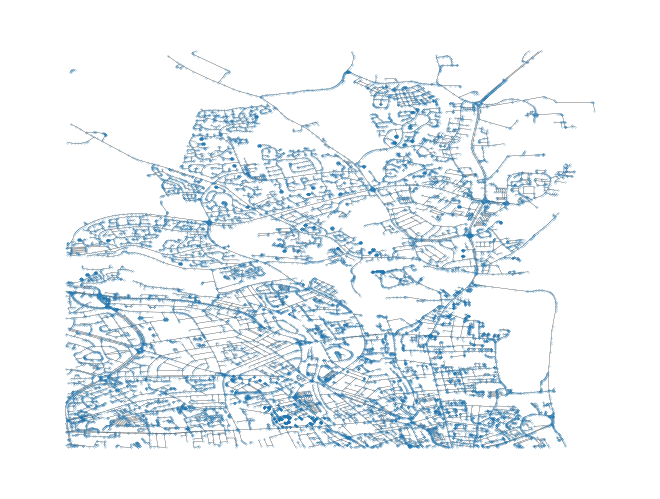

In [74]:
position =list(G_primal.nodes)
pos = {point: point for point in position}
nx.draw(G_primal,pos=pos,node_size=0.03,width=0.2)

In [75]:
components = list(nx.connected_components(G_primal.copy()))
largest_component = max(components, key=len)
len(largest_component)
largest_road_network = G_primal.subgraph(largest_component)

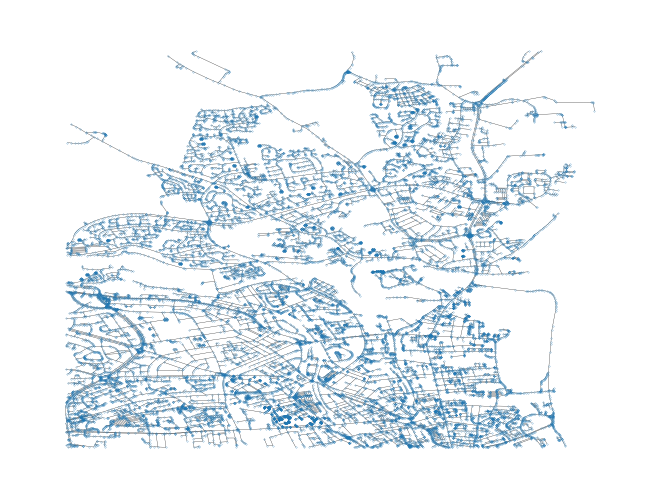

In [76]:
position =list(largest_road_network.nodes)
pos = {point: point for point in position}
nx.draw(largest_road_network,pos=pos,node_size=0.03,width=0.2)

In [22]:
len(largest_component)

37925

In [24]:
for node, node_data in largest_road_network.nodes(data=True):
    print(f"Node ID: {node}")
    print(f"Attributes: {node_data}")
    break

Node ID: (-2.0968263149261475, 57.162654876708984)
Attributes: {}


In [36]:
import json
# Save the graph as a JSON file with node and edge attributes (optional)
with open("Data/AberdeenRoadNetworx.json", "w") as f:
    data = nx.node_link_data(largest_road_network)  # Get data in node-link format suitable for JSON
    json.dump(data, f, indent=4)  # Dump data to file with indentation for readability


TypeError: Object of type CRS is not JSON serializable

In [36]:


import ipyleaflet

In [60]:
responce=""
def on_click(**kwargs):
    global responce
    responce=kwargs


In [61]:
buildings = ipyleaflet.GeoData(
        geo_dataframe=aberdeen,
            style={'color': 'black', 'fillColor': 'tomato', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
        )
buildings.on_click(on_click)

tracks = ipyleaflet.GeoData(
        geo_dataframe=walk,
            style={'color': 'black',  'weight':1.9, },
        )
tracks.on_click(on_click)

In [62]:
#buildings.on_click(on_click_building)
m = ipyleaflet.Map(
            center=(57.18, -2.11),
            zoom_control=False,
            zoom=14,
            scroll_wheel_zoom=True,
            dragging=True)
m.add_layer(buildings)
m.add_layer(tracks)
m.add_control(ipyleaflet.leaflet.ScaleControl(position="bottomleft"))
display(m)

Map(center=[57.18, -2.11], controls=(AttributionControl(options=['position', 'prefix'], position='bottomright'…

In [67]:
#responce

In [77]:
import networkx as nx
import geopandas
import momepy

In [85]:
roads_df  = geopandas.read_file('Data/AberdeenRoads.geojson')
roads_df=roads_df.explode()

/tmp/ipykernel_9943/3758341035.py:2: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  roads_df=roads_df.explode()


In [86]:
roads_df.head()

,,DataZone,Name,TotPop2011,ResPop2011,HHCnt2011,StdAreaHa,StdAreaKm2,Shape_Leng,Shape_Area,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,0,S01006529,Garthdee - 04,896,892,496,46.42805,0.464279,4735.331279,464280.511192,8024083,5152,cycleway,None,None,B,0,0,F,F,"LINESTRING (-2.12892 57.12697, -2.12866 57.127..."
1,0,S01006529,Garthdee - 04,896,892,496,46.42805,0.464279,4735.331279,464280.511192,8028992,5113,primary,South Anderson Drive,A92,F,48,0,F,F,"LINESTRING (-2.12226 57.12388, -2.12234 57.124..."
2,0,S01006529,Garthdee - 04,896,892,496,46.42805,0.464279,4735.331279,464280.511192,8028995,5113,primary,Garthdee Roundabout,A92,B,48,0,F,F,"LINESTRING (-2.12155 57.12374, -2.12158 57.123..."
3,0,S01006529,Garthdee - 04,896,892,496,46.42805,0.464279,4735.331279,464280.511192,8028997,5113,primary,Stonehaven Road,A92,F,48,0,F,F,"LINESTRING (-2.12145 57.12383, -2.12138 57.123..."
4,0,S01006529,Garthdee - 04,896,892,496,46.42805,0.464279,4735.331279,464280.511192,8028999,5115,tertiary,Garthdee Road,C124C,F,0,0,F,F,"LINESTRING (-2.12182 57.12364, -2.12190 57.123..."


In [87]:
G_primal = momepy.gdf_to_nx(roads_df, approach="primal")

/home/ric/Projects/ThePlanningMachine/venv/lib/python3.10/site-packages/momepy/utils.py:252: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length


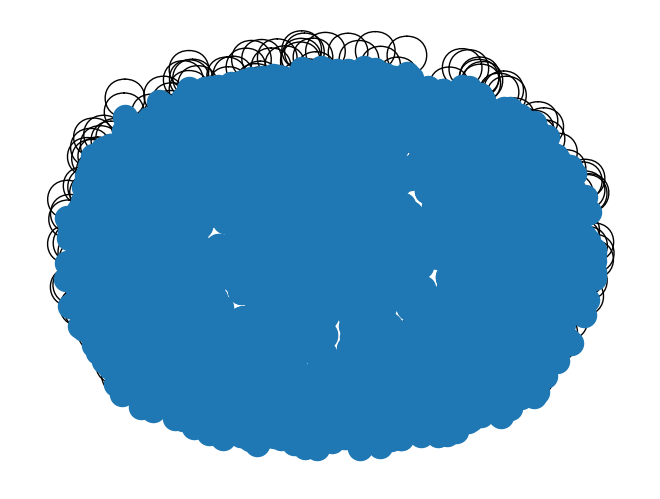

In [89]:
nx.draw(
    G_primal, {n: [n[0], n[1]] for n in list(G_primal.nodes)}
    , node_size=50
)